In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from os.path import expanduser as ospath


# Leitura de Dados

In [2]:
def logReturn(series):
    return np.log(series/series.shift(1))

In [3]:
def readData(file):
    df = pd.read_excel(ospath(os.getcwd() + '/data/Curva Forward/' + file), index_col=0, skiprows=[0,1,2], header = None)
    df.columns = ['date', 'price']
    df["date"] = pd.to_datetime(df["date"])
    df['logReturn'] = logReturn(df.price)
    return df

In [4]:
data = {'M1': '2019-03-01_15-12-06_Evolucao_historica_da__Media__na_serie_M__1_na_fonte_Convencional_SE_.xlsx' ,
        'M2': '2019-03-01_15-15-00_Evolucao_historica_da__Media__na_serie_M__2_na_fonte_Convencional_SE_.xlsx',
        'M3': '2019-03-01_15-15-12_Evolucao_historica_da__Media__na_serie_M__3_na_fonte_Convencional_SE_.xlsx' ,
        'A0': '2019-03-01_15-16-21_Evolucao_historica_da__Media__na_serie_A__0_na_fonte_Convencional_SE_.xlsx',
        'A1': '2019-03-01_15-16-32_Evolucao_historica_da__Media__na_serie_A__1_na_fonte_Convencional_SE_.xlsx', 
        'A2': '2019-03-01_15-16-45_Evolucao_historica_da__Media__na_serie_A__2_na_fonte_Convencional_SE_.xlsx',
        'A3': '2019-03-01_15-16-58_Evolucao_historica_da__Media__na_serie_A__3_na_fonte_Convencional_SE_.xlsx',
        'A4': '2019-03-01_15-17-12_Evolucao_historica_da__Media__na_serie_A__4_na_fonte_Convencional_SE_.xlsx'}




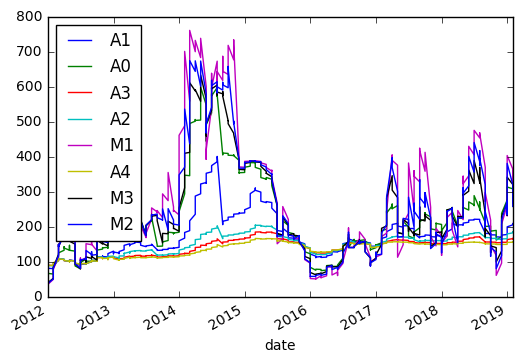

In [18]:
for key in data.keys():
    df = readData(data[key])
    price[key] = df.price.interpolate()

Prices = pd.DataFrame(price)
Prices.set_index(Prices.date, inplace=True, drop=True)
Prices = Prices.dropna()[[key for key in data.keys()]]
Prices.head()
Prices.plot()

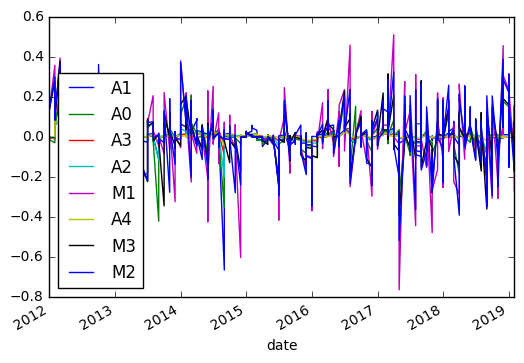

In [21]:
for key in data.keys():
    df = readData(data[key])
    ret[key] = logReturn(df.price.interpolate())

Returns = pd.DataFrame(ret)
Returns.set_index(Returns.date, inplace=True, drop=True)
Returns = Returns.dropna()[[key for key in data.keys()]]
Returns.head()
Returns.plot()


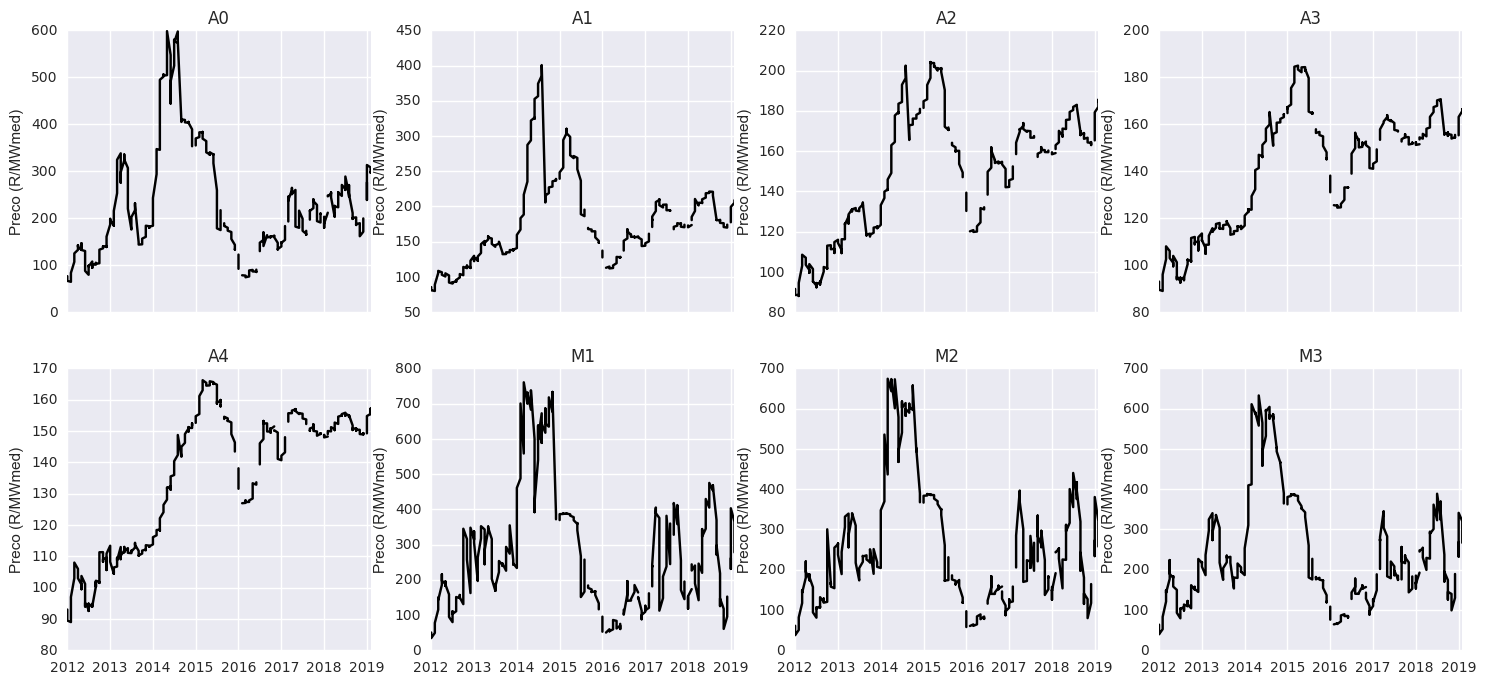

In [23]:
k = 0
products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', figsize = (18,8))
for i in range(2):
    for j in range(4):
        df = readData(data[products[k]])
        ax[i, j].plot(df.date,df.price, 'k')
        ax[i, j].set_title(products[k])
        ax[i,j].set(ylabel='Preco (R/MWmed)')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/priceSeries.png'))


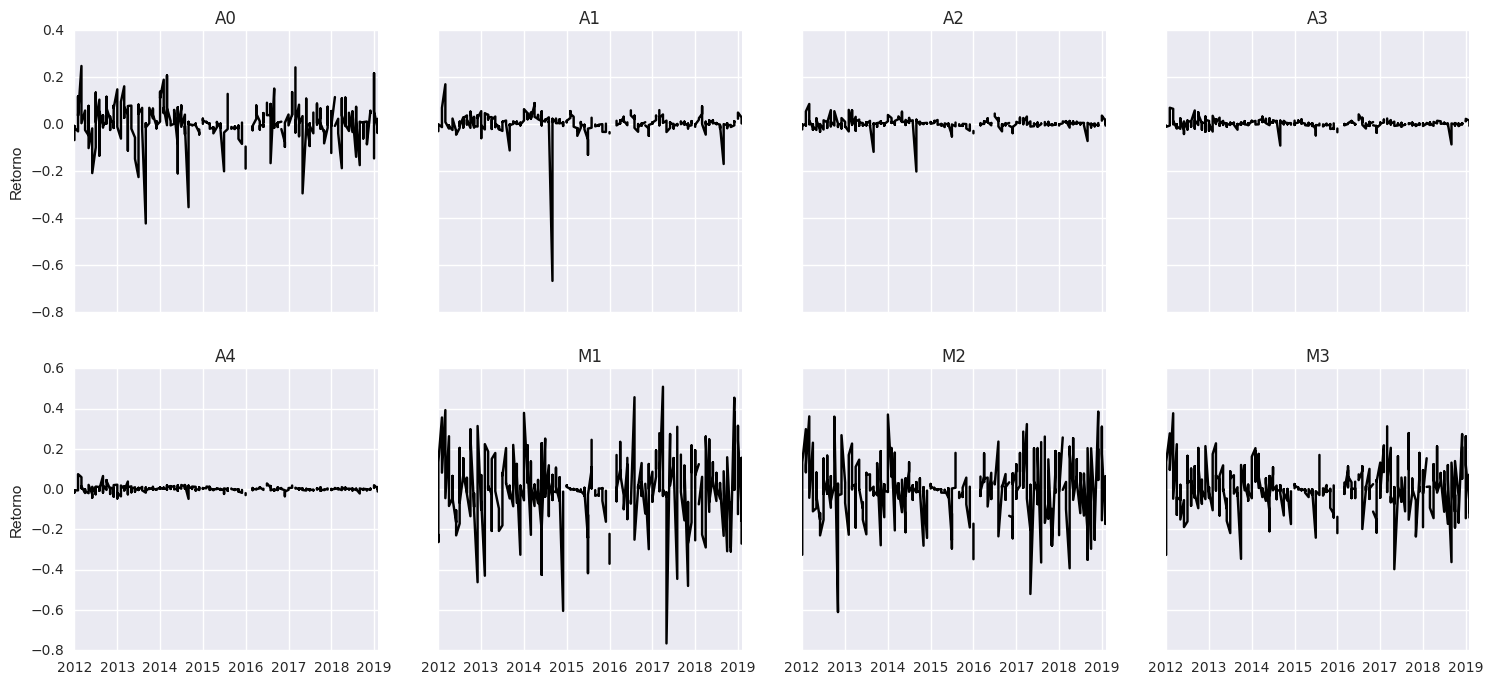

In [24]:
k = 0
products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        df = readData(data[products[k]])
        ax[i, j].plot(df.date,df.logReturn, 'k')
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Retorno')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/returnSeries.png'))

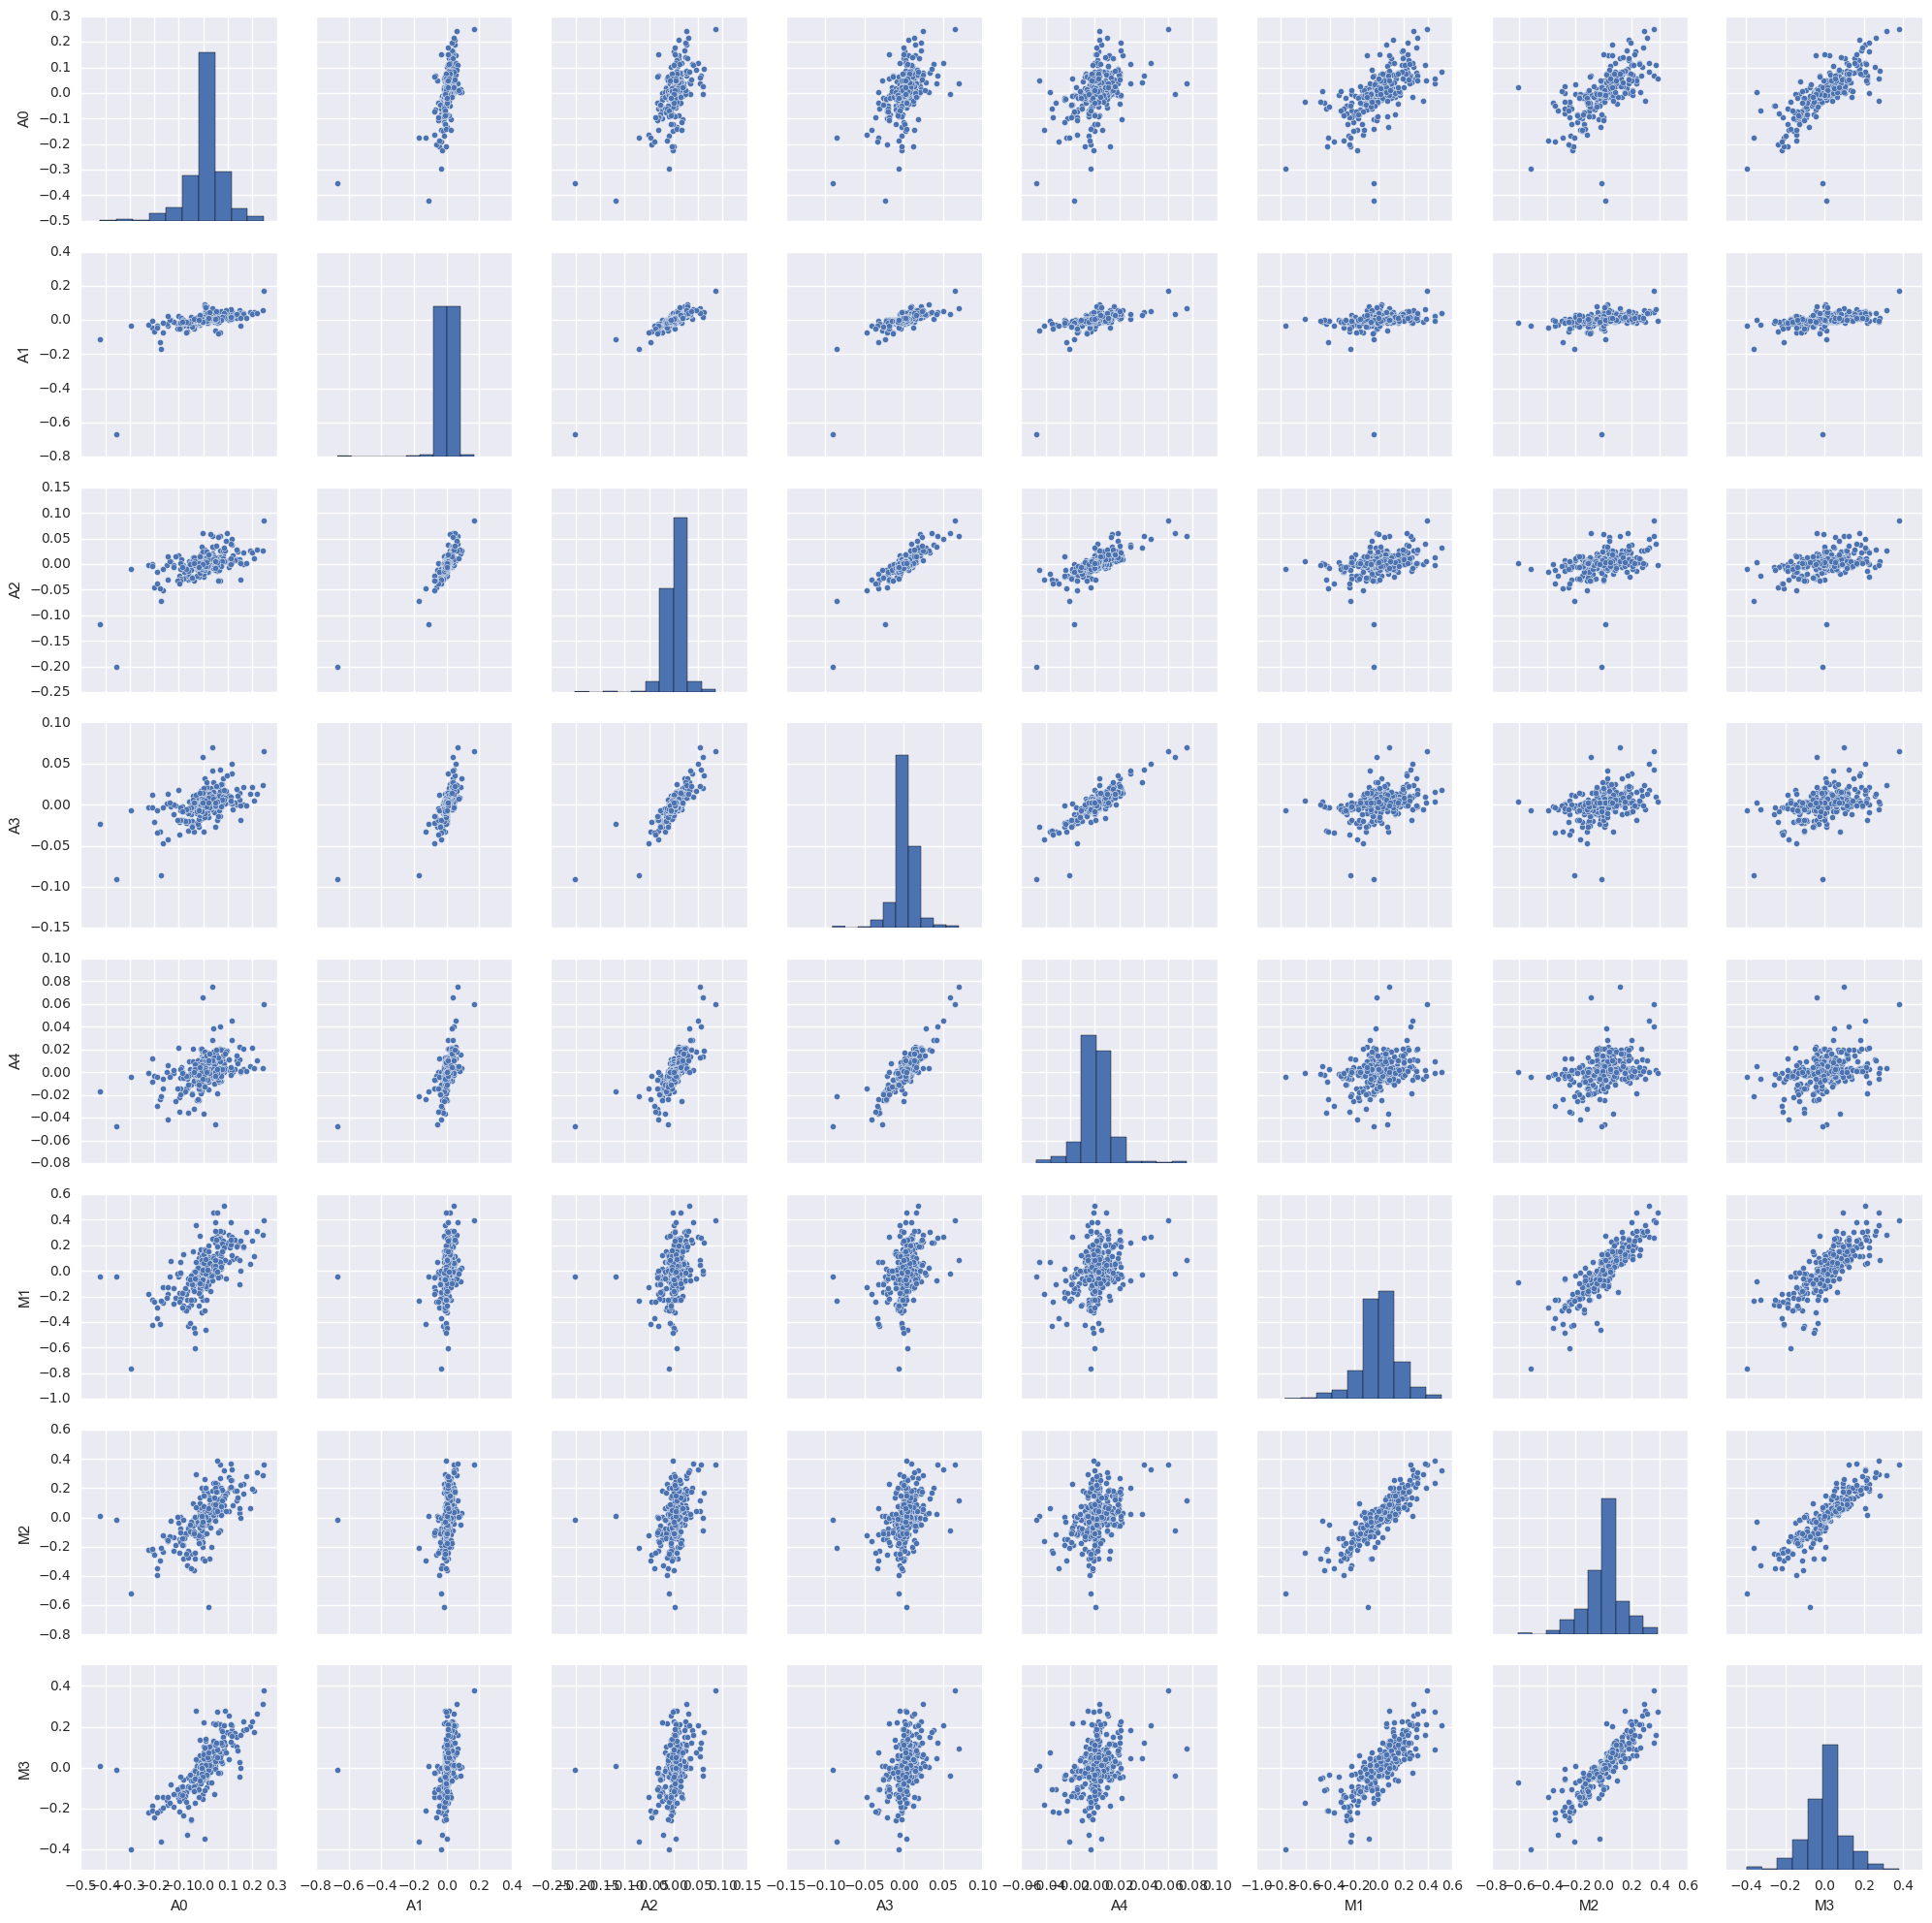

In [109]:
fig = sns.pairplot(Returns)
fig.savefig("correlationPlot.png")

In [111]:
Returns.corr()


,A0,A1,A2,A3,A4,M1,M2,M3
A0,1.000000,0.571328,0.595437,0.518877,0.435211,0.634011,0.663985,0.749715
A1,0.571328,1.000000,0.842539,0.709232,0.551783,0.278095,0.300962,0.337892
A2,0.595437,0.842539,1.000000,0.856041,0.733624,0.334943,0.357733,0.389670
A3,0.518877,0.709232,0.856041,1.000000,0.865931,0.352165,0.379113,0.435046
A4,0.435211,0.551783,0.733624,0.865931,1.000000,0.299033,0.331382,0.353928
M1,0.634011,0.278095,0.334943,0.352165,0.299033,1.000000,0.863085,0.796667
M2,0.663985,0.300962,0.357733,0.379113,0.331382,0.863085,1.000000,0.864676
M3,0.749715,0.337892,0.389670,0.435046,0.353928,0.796667,0.864676,1.000000


# Markov switching autoregression models (Price)

AttributeError: 'module' object has no attribute 'MarkovAutoregression'

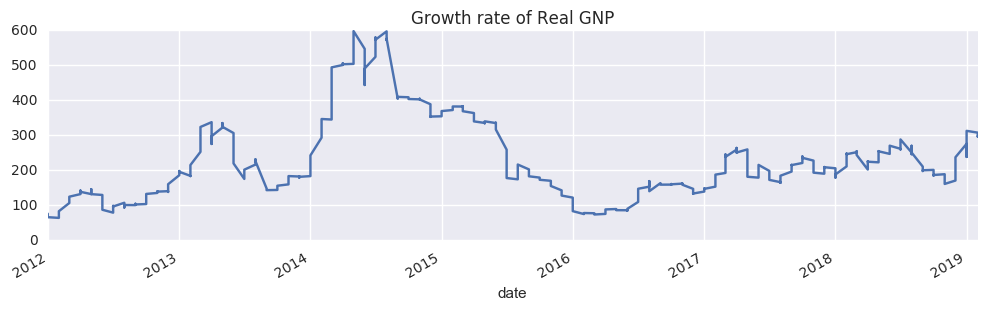

In [27]:
import statsmodels.api as sm


# Plot the data
Prices.A0.plot(title='Growth rate of Real GNP', figsize=(12,3))

# Fit the model
mod_hamilton = sm.tsa.MarkovAutoregression(Prices.A0, k_regimes=2, order=2, switching_ar=False)
res_hamilton = mod_hamilton.fit()

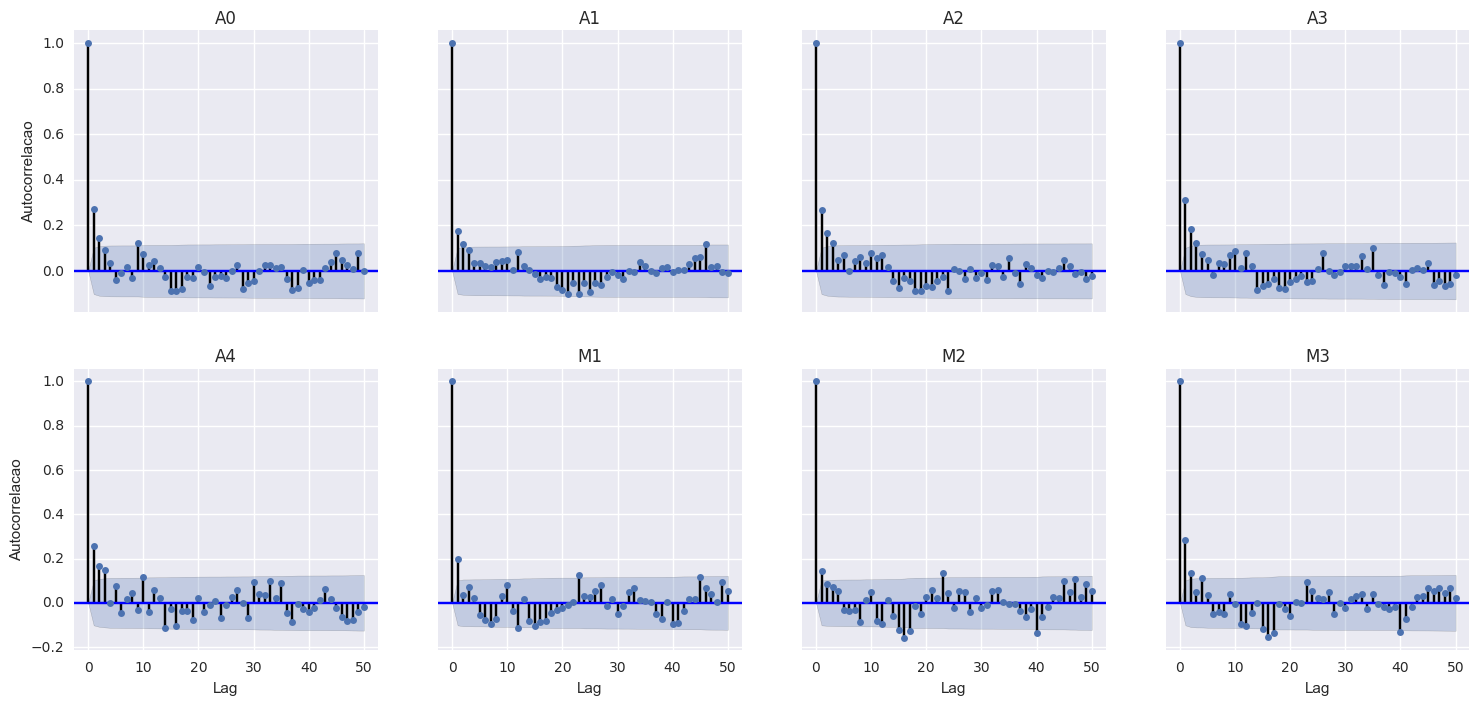

In [124]:
from statsmodels.graphics.tsaplots import plot_acf

k = 0

products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        plot = plot_acf(Returns[products[k]], lags = 50, ax = ax[i, j])
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Autocorrelacao')
        ax[1,j].set(xlabel='Lag')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/acf.png'))

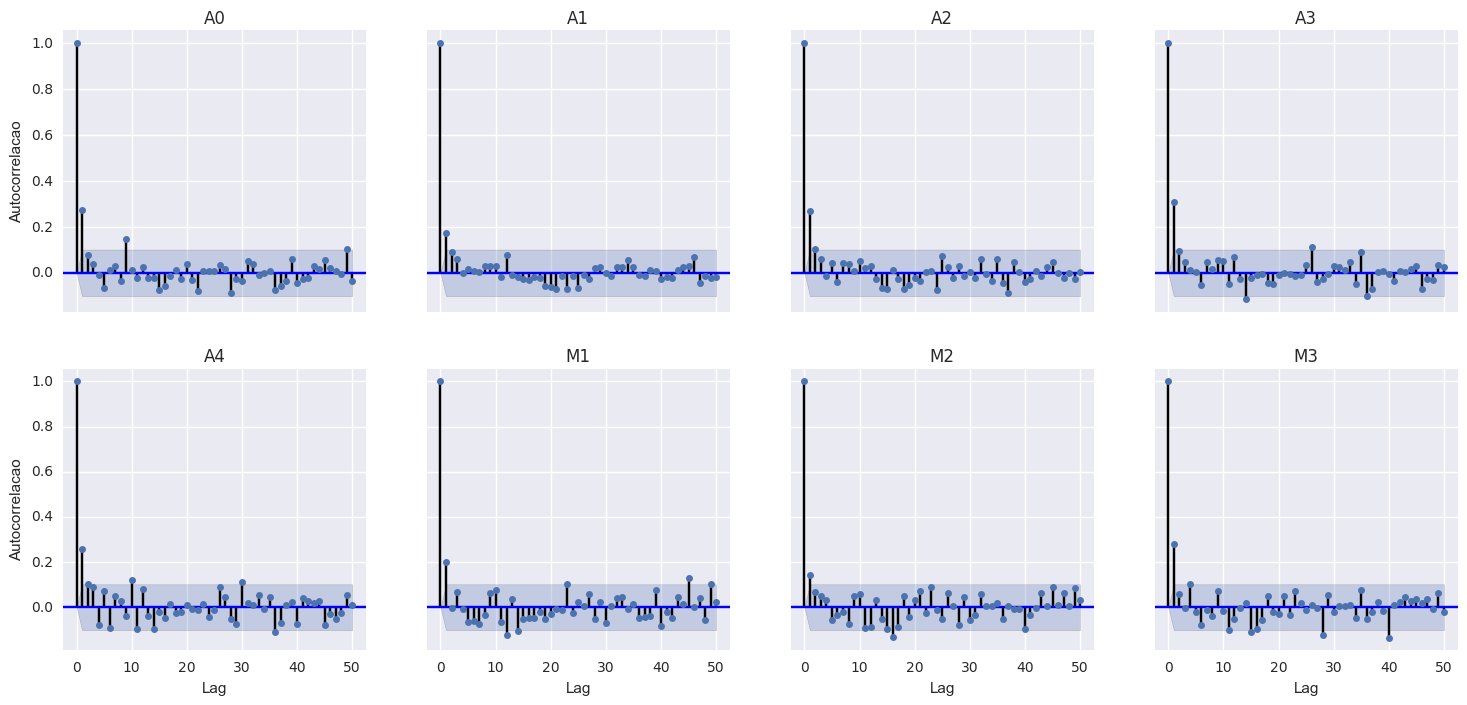

In [133]:
from statsmodels.graphics.tsaplots import plot_pacf
k = 0

products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        plot = plot_pacf(Returns[products[k]], lags = 50, ax = ax[i, j])
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Autocorrelacao')
        ax[1,j].set(xlabel='Lag')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/pacf.png'))

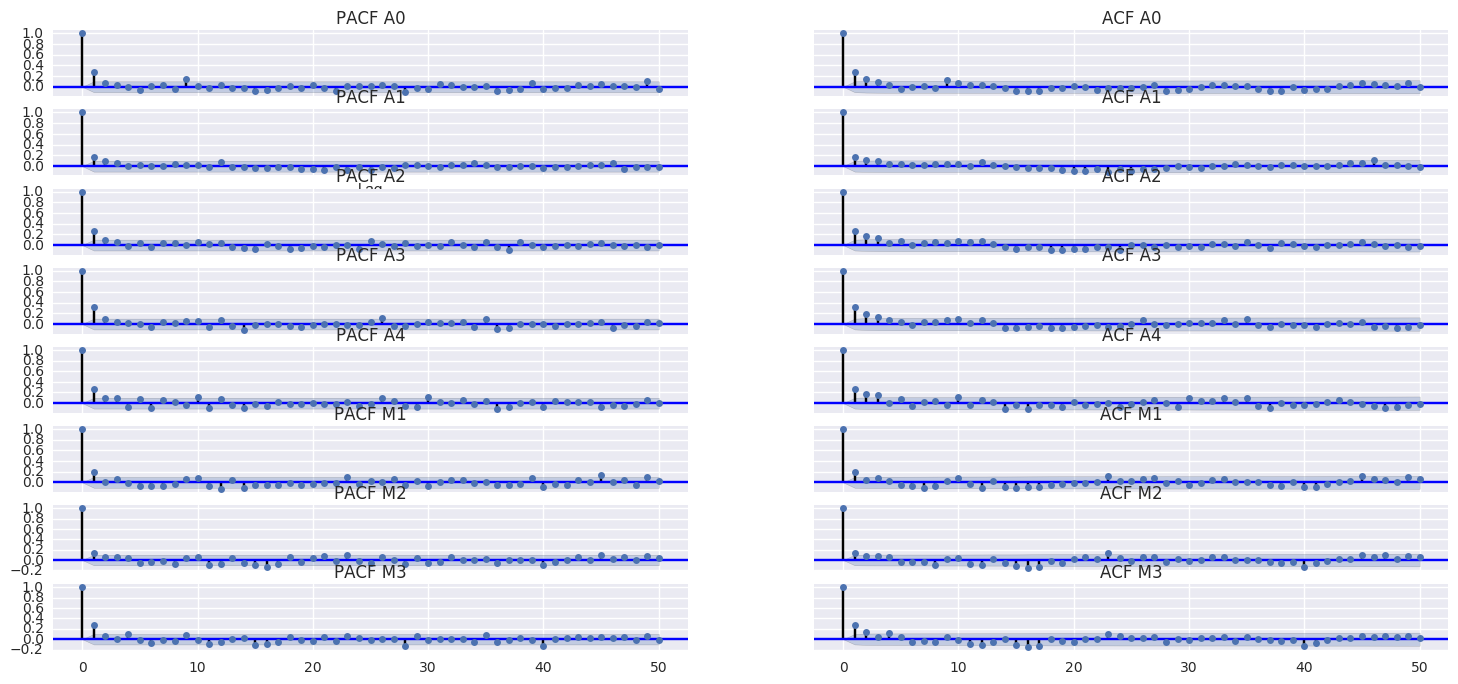

In [138]:
k=0
products = sorted(data.keys())
fig, ax = plt.subplots(8, 2, sharex='col', sharey='row', figsize = (18,8))
for i in range(8):
        plot = plot_pacf(Returns[products[k]], lags = 50, ax = ax[i, 0])
        plot = plot_acf(Returns[products[k]], lags = 50, ax = ax[i, 1])
        ax[i, 0].set_title('PACF ' + products[k])
        ax[i, 1].set_title('ACF ' + products[k])
   
        ax[1,0].set(xlabel='Lag')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/pacf_acf.png'))

In [139]:
import statsmodels.tsa.api as smt


In [163]:
for k in data.keys():
    best_aic = np.inf 
    best_order = None
    best_mdl = None


    a = np.empty([3,4])

    for i in range(3):
        for j in range(4):
            try:
                tmp_mdl = smt.ARMA(Returns[k], order=(i, j)).fit(
                    method='mle', trend='nc'
                )
                tmp_aic = tmp_mdl.aic
                a[i,j] = tmp_aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, j)
                    best_mdl = tmp_mdl
            except: continue

    print(k)
    print('Best aic: {:6.5f} | order: {}'.format(best_aic, best_order))


A1
Best aic: -1267.21233 | order: (1, 1)


C:\anaconda\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


A0
Best aic: -901.48288 | order: (1, 1)
A3
Best aic: -2107.56753 | order: (1, 1)
A2
Best aic: -1868.41243 | order: (1, 1)
M1
Best aic: -326.86021 | order: (2, 1)
A4
Best aic: -2220.23438 | order: (0, 3)
M3
Best aic: -653.30471 | order: (1, 0)
M2
Best aic: -447.05565 | order: (1, 1)


In [164]:
from statsmodels.stats.diagnostic import het_arch

In [176]:
A0 = smt.ARMA(Returns.A0, order=(1, 1)).fit(
    method='mle', trend='nc')
het_arch(A0.resid)

(10.952571483107612,
 0.85901889293105782,
 0.63111002674795746,
 0.86703052850599238)

In [177]:
A1 = smt.ARMA(Returns.A1, order=(1, 1)).fit(
    method='mle', trend='nc')
het_arch(A1.resid)

(0.36752921830441432,
 0.99999999999603473,
 0.020547464685834876,
 0.99999999999690004)

In [178]:
A2 = smt.ARMA(Returns.A2, order=(1, 1)).fit(
    method='mle', trend='nc')
het_arch(A2.resid)

(2.0209798101612, 0.99999627318373951, 0.1135147327405658, 0.99999697069113724)

In [179]:
A3 = smt.ARMA(Returns.A3, order=(1, 1)).fit(
    method='mle', trend='nc')
het_arch(A3.resid)

(7.7712048922421371,
 0.97119717895579682,
 0.44370207351159224,
 0.97393132577200425)

In [180]:
A4 = smt.ARMA(Returns.A4, order=(0, 3)).fit(
    method='mle', trend='nc')
het_arch(A1.resid)

(0.36752921830441432,
 0.99999999999603473,
 0.020547464685834876,
 0.99999999999690004)

In [182]:
M1 = smt.ARMA(Returns.M1, order=(2, 1)).fit(
    method='mle', trend='nc')
het_arch(M1.resid)

(25.221375358404103,
 0.089863104987190259,
 1.5159996722310032,
 0.08648175238481888)

In [183]:
M2 = smt.ARMA(Returns.M2, order=(1, 1)).fit(
    method='mle', trend='nc')
het_arch(M2.resid)

(22.245839271049256,
 0.17544857821617732,
 1.3252258096008775,
 0.17386123897722142)

In [184]:
M3 = smt.ARMA(Returns.M3, order=(1, 0)).fit(
    method='mle', trend='nc')
het_arch(M3.resid)

(36.996850082522485,
 0.0033684663324460946,
 2.3058845382648836,
 0.0025364613739956598)